In [2]:
import numpy as np
import matplotlib.pyplot as plt
from qucat import GUI
from scipy.constants import epsilon_0, pi

# Computing an optomechanical coupling

In this application, we show how QuCAT can be used for analyzing microwave optomechanics.

One common implementation of microwave optomechanics involves a mechanically compliant capacitor, or drum, embedded in one or many microwave resonators.

The quantity of interest is the single-photon optomechanical coupling.
This quantity is the change in mode frequency $\omega_m$ that occurs for a displacement $x_\text{zpf}$ of the drum (the zero-point fluctuations in displacement)

$g_0 = x_\text{zpf}\frac{\partial \omega_m}{\partial x}$

The change in mode frequency as the drum head moves $\partial \omega_m/\partial x$ is not straightforward to compute for complicated circuits. One such example is that of https://arxiv.org/abs/1602.05779, where two microwave resonators are coupled to a drum via a network of capacitances as shown below

![alt text](graphics/OM_circuit.png "")

*illustration from https://arxiv.org/abs/1602.05779*

Here, we will use QuCAT to calculate the optomechanical coupling of the drums to both resonator modes of this circuit.

We start by reproducing the circuit with the GUI

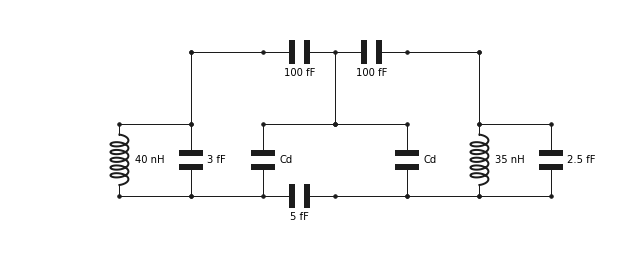

In [3]:
OM = GUI('circuits/optomechanics.txt', # location of the circuit file
        edit=True, # open the GUI to edit the circuit
        plot=True, # plot the circuit after having edited it
        print_network=False) # print the network

Following https://arxiv.org/abs/1103.2144, we assume the rest position of the drum to be $D=50$ nm above the capacitive plate below, and we assume the zero-point fluctuations in displacement to be $x_\text{zpf} = 4$ fm.

In [3]:
# gap in Cd
D = 50e-9
# zero-point fluctuations
x_zpf = 4e-15

The next step is to define an expression for $C_d$ as a function of the mechanical displacement $x$ of the drum head with respect to the immobile capacitive plate below it. 

In [4]:
def Cd(x):
    # Radius of the drumhead
    radius = 10e-6
    # Formula for half a circular parallel plate capacitor
    return epsilon_0*pi*radius**2/x/2

Since we have left $C_d$ as a variable in the circuit, we can now calculate how the mode frequency, calculated with the function `eigenfrequencies`, changes with the drum displacement $x$: $G = \partial \omega_m/\partial x$ using a fininte difference method.

In [5]:
# difference quotient
h = 1e-18
# derivative of eigenfrequencies
G = (OM.eigenfrequencies(Cd = Cd(D+h))-OM.eigenfrequencies(Cd = Cd(D)))/h
print(G)

[2.34842300e+16 3.60612869e+16]


`G` is an array with values $2.3\times 10^{16}$ Hz.$\text{m}^{-1}$ and $3.6\times 10^{16}$ Hz.$\text{m}^{-1}$ corresponding to the lowest and higher frequency modes respectively.
Multiplying these values with the zero-point fluctuations yields the single-photon couplings $g_0$

In [6]:
g_0 = G*x_zpf
print(g_0)

[ 93.93692017 144.24514771]


of $94$ and $144$ Hz. If we want to know to which part of the circuit (resonator 1 or 2 in the figure shown above) this mode pertains, we can visualize it

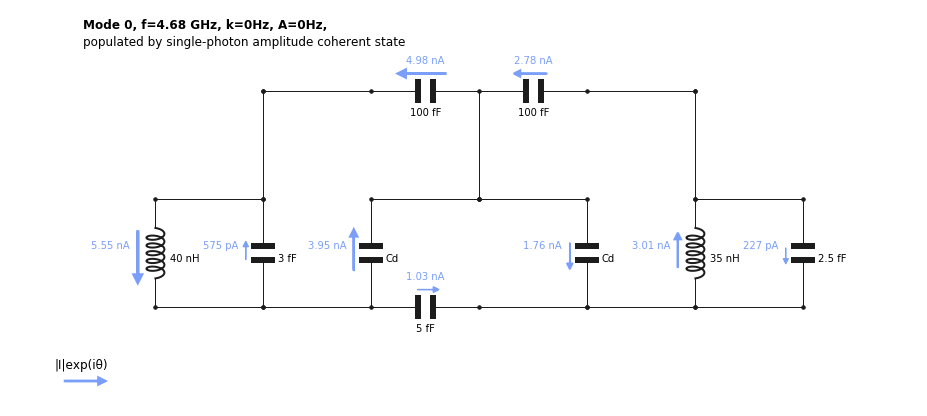

In [7]:
OM.show_normal_mode(
    mode=0,
    quantity='current',
    Cd=Cd(D))

and we find that the current is majoritarily located in the inductor of resonator 1.
But the two modes are quite hybridized as there is only twice the amount of current in the inductor of resonator 1 compared to that of resonator 2.